In [1]:
import numpy as np
from PIL import Image
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import os
import cv2
from skimage import io
import fs
import torchvision
from torchvision import transforms
import torch

from torch.utils.data import Dataset, DataLoader
import torchvision

import multiprocessing

import torch.nn as nn
cuda = torch.cuda.is_available()
import time
device = torch.device("cuda" if cuda else "cpu")
from tqdm import tqdm

In [ ]:
path='C:/Users/zhaoh/Downloads/FYP/dataset/train/'#segment the training images from the ipad
i=0
for f in os.listdir(path):
    name=os.path.join(path+str(f))
    if "PNG" in name:
        im = cv2.imread(name)
        plt.imshow(im)
        #plt.show()
        im1=im[300:435,420:575]#vertical 135,horizontal 155
        im2=im[300:435,580:735]
        im3=im[300:435,740:895]
        im4=im[300:435,900:1055]
        im5=im[300:435,1060:1210]
        im6=im[300:435,1215:1370]
        
        im7=im[440:575,420:575]
        im8=im[440:575,580:735]
        im9=im[440:575,740:895]
        im10=im[440:575,900:1055]
        im11=im[440:575,1060:1210]
        im12=im[440:575,1215:1370]
        
        im13=im[580:715,420:575]
        im14=im[580:715,580:735]
        im15=im[580:715,740:895]
        im16=im[580:715,900:1055]
        im17=im[580:715,1060:1210]
        im18=im[580:715,1215:1370]
        
        im19=im[720:855,420:575]
        im20=im[720:855,580:735]
        im21=im[720:855,740:895]
        im22=im[720:855,900:1055]
        im23=im[720:855,1060:1210]
        im24=im[720:855,1215:1370]
        
        im25=im[860:995,420:575]
        im26=im[860:995,580:735]
        im27=im[860:995,740:895]
        im28=im[860:995,900:1055]
        im29=im[860:995,1060:1210]
        im30=im[860:995,1215:1370]
        
        im31=im[1000:1140,420:575]
        im32=im[1000:1140,580:735]
        im33=im[1000:1140,740:895]
        im34=im[1000:1140,900:1055]
        im35=im[1000:1140,1060:1210]
        im36=im[1000:1140,1215:1370]
        
        im37=im[1145:1280,420:575]
        im38=im[1145:1280,580:735]
        im39=im[1145:1280,740:895]
        im40=im[1145:1280,900:1055]
        im41=im[1145:1280,1060:1210]
        im42=im[1145:1280,1215:1370]
        
        im43=im[1285:1420,420:575]
        im44=im[1285:1420,580:735]
        im45=im[1285:1420,740:895]
        im46=im[1285:1420,900:1055]
        im47=im[1285:1420,1060:1210]
        im48=im[1285:1420,1215:1370]
        
        im49=im[1425:1560,420:575]
        im50=im[1425:1560,580:735]
        im51=im[1425:1560,740:895]
        im52=im[1425:1560,900:1055]
        im53=im[1425:1560,1060:1210]
        im54=im[1425:1560,1215:1370]
        
        im55=im[1980:2117,420:575]
        im56=im[1980:2117,580:735]
        im57=im[1980:2117,740:895]
        im58=im[1980:2117,900:1055]
        im59=im[1980:2117,1060:1210]
        im60=im[1980:2117,1215:1370]
        #im5=im[870:990,420:575]
        '''
        plt.imshow(im55)
        plt.show()
        plt.imshow(im56)
        plt.show()
        plt.imshow(im57)
        plt.show()
        plt.imshow(im58)
        plt.show()
        plt.imshow(im59)
        plt.show()
        plt.imshow(im60)
        plt.show()
        '''
        i+=1
        #im=255-im
        #flip = cv2.flip(im, 1)
        
        cv2.imwrite(path+'one/'+str(np.random.randint(100000,size=1).item())+'.jpg',im1)
        cv2.imwrite(path+'one/'+str(np.random.randint(100000,size=1).item())+'.jpg',im2)
        cv2.imwrite(path+'one/'+str(np.random.randint(100000,size=1).item())+'.jpg',im3)
        cv2.imwrite(path+'one/'+str(np.random.randint(100000,size=1).item())+'.jpg',im4)
        cv2.imwrite(path+'one/'+str(np.random.randint(100000,size=1).item())+'.jpg',im5)
        cv2.imwrite(path+'one/'+str(np.random.randint(100000,size=1).item())+'.jpg',im6)
        
        cv2.imwrite(path+'two/'+str(np.random.randint(100000,size=1).item())+'.jpg',im7)
        cv2.imwrite(path+'two/'+str(np.random.randint(100000,size=1).item())+'.jpg',im8)
        cv2.imwrite(path+'two/'+str(np.random.randint(100000,size=1).item())+'.jpg',im9)
        cv2.imwrite(path+'two/'+str(np.random.randint(100000,size=1).item())+'.jpg',im10)
        cv2.imwrite(path+'two/'+str(np.random.randint(100000,size=1).item())+'.jpg',im11)
        cv2.imwrite(path+'two/'+str(np.random.randint(100000,size=1).item())+'.jpg',im12)
        
        cv2.imwrite(path+'three/'+str(np.random.randint(100000,size=1).item())+'.jpg',im13)
        cv2.imwrite(path+'three/'+str(np.random.randint(100000,size=1).item())+'.jpg',im14)
        cv2.imwrite(path+'three/'+str(np.random.randint(100000,size=1).item())+'.jpg',im15)
        cv2.imwrite(path+'three/'+str(np.random.randint(100000,size=1).item())+'.jpg',im16)
        cv2.imwrite(path+'three/'+str(np.random.randint(100000,size=1).item())+'.jpg',im17)
        cv2.imwrite(path+'three/'+str(np.random.randint(100000,size=1).item())+'.jpg',im18)
        
        cv2.imwrite(path+'four/'+str(np.random.randint(100000,size=1).item())+'.jpg',im19)
        cv2.imwrite(path+'four/'+str(np.random.randint(100000,size=1).item())+'.jpg',im20)
        cv2.imwrite(path+'four/'+str(np.random.randint(100000,size=1).item())+'.jpg',im21)
        cv2.imwrite(path+'four/'+str(np.random.randint(100000,size=1).item())+'.jpg',im22)
        cv2.imwrite(path+'four/'+str(np.random.randint(100000,size=1).item())+'.jpg',im23)
        cv2.imwrite(path+'four/'+str(np.random.randint(100000,size=1).item())+'.jpg',im24)
        
        cv2.imwrite(path+'five/'+str(np.random.randint(100000,size=1).item())+'.jpg',im25)
        cv2.imwrite(path+'five/'+str(np.random.randint(100000,size=1).item())+'.jpg',im26)
        cv2.imwrite(path+'five/'+str(np.random.randint(100000,size=1).item())+'.jpg',im27)
        cv2.imwrite(path+'five/'+str(np.random.randint(100000,size=1).item())+'.jpg',im28)
        cv2.imwrite(path+'five/'+str(np.random.randint(100000,size=1).item())+'.jpg',im29)
        cv2.imwrite(path+'five/'+str(np.random.randint(100000,size=1).item())+'.jpg',im30)
        
        cv2.imwrite(path+'six/'+str(np.random.randint(100000,size=1).item())+'.jpg',im31)
        cv2.imwrite(path+'six/'+str(np.random.randint(100000,size=1).item())+'.jpg',im32)
        cv2.imwrite(path+'six/'+str(np.random.randint(100000,size=1).item())+'.jpg',im33)
        cv2.imwrite(path+'six/'+str(np.random.randint(100000,size=1).item())+'.jpg',im34)
        cv2.imwrite(path+'six/'+str(np.random.randint(100000,size=1).item())+'.jpg',im35)
        cv2.imwrite(path+'six/'+str(np.random.randint(100000,size=1).item())+'.jpg',im36)
        
        cv2.imwrite(path+'seven/'+str(np.random.randint(100000,size=1).item())+'.jpg',im37)
        cv2.imwrite(path+'seven/'+str(np.random.randint(100000,size=1).item())+'.jpg',im38)
        cv2.imwrite(path+'seven/'+str(np.random.randint(100000,size=1).item())+'.jpg',im39)
        cv2.imwrite(path+'seven/'+str(np.random.randint(100000,size=1).item())+'.jpg',im40)
        cv2.imwrite(path+'seven/'+str(np.random.randint(100000,size=1).item())+'.jpg',im41)
        cv2.imwrite(path+'seven/'+str(np.random.randint(100000,size=1).item())+'.jpg',im42)
        
        cv2.imwrite(path+'eight/'+str(np.random.randint(100000,size=1).item())+'.jpg',im43)
        cv2.imwrite(path+'eight/'+str(np.random.randint(100000,size=1).item())+'.jpg',im44)
        cv2.imwrite(path+'eight/'+str(np.random.randint(100000,size=1).item())+'.jpg',im45)
        cv2.imwrite(path+'eight/'+str(np.random.randint(100000,size=1).item())+'.jpg',im46)
        cv2.imwrite(path+'eight/'+str(np.random.randint(100000,size=1).item())+'.jpg',im47)
        cv2.imwrite(path+'eight/'+str(np.random.randint(100000,size=1).item())+'.jpg',im48)
        
        cv2.imwrite(path+'nine/'+str(np.random.randint(100000,size=1).item())+'.jpg',im49)
        cv2.imwrite(path+'nine/'+str(np.random.randint(100000,size=1).item())+'.jpg',im50)
        cv2.imwrite(path+'nine/'+str(np.random.randint(100000,size=1).item())+'.jpg',im51)
        cv2.imwrite(path+'nine/'+str(np.random.randint(100000,size=1).item())+'.jpg',im52)
        cv2.imwrite(path+'nine/'+str(np.random.randint(100000,size=1).item())+'.jpg',im53)
        cv2.imwrite(path+'nine/'+str(np.random.randint(100000,size=1).item())+'.jpg',im54)
        
        cv2.imwrite(path+'zero/'+str(np.random.randint(100000,size=1).item())+'.jpg',im55)
        cv2.imwrite(path+'zero/'+str(np.random.randint(100000,size=1).item())+'.jpg',im56)
        cv2.imwrite(path+'zero/'+str(np.random.randint(100000,size=1).item())+'.jpg',im57)
        cv2.imwrite(path+'zero/'+str(np.random.randint(100000,size=1).item())+'.jpg',im58)
        cv2.imwrite(path+'zero/'+str(np.random.randint(100000,size=1).item())+'.jpg',im59)
        cv2.imwrite(path+'zero/'+str(np.random.randint(100000,size=1).item())+'.jpg',im60)
        
        
print(i)

In [ ]:
path='C:/Users/zhaoh/Downloads/FYP/dataset/train/'#segment the training images from the ipad
i=0
for f in os.listdir(path):
    name=os.path.join(path+str(f))
    if "PNG" in name:
        im = cv2.imread(name)
        plt.imshow(im)
        plt.show()
        im1=im[300:435,420:575]#vertical 135,horizontal 155
        im2=im[300:435,580:735]
        im3=im[300:435,740:895]
        im4=im[300:435,900:1055]
        im5=im[300:435,1060:1210]
        im6=im[300:435,1215:1370]
        
        im7=im[440:575,420:575]
        im8=im[440:575,580:735]
        im9=im[440:575,740:895]
        im10=im[440:575,900:1055]
        im11=im[440:575,1060:1210]
        im12=im[440:575,1215:1370]
        
        im13=im[580:715,420:575]
        im14=im[580:715,580:735]
        im15=im[580:715,740:895]
        im16=im[580:715,900:1055]
        im17=im[580:715,1060:1210]
        im18=im[580:715,1215:1370]
        
        im19=im[720:855,420:575]
        im20=im[720:855,580:735]
        im21=im[720:855,740:895]
        im22=im[720:855,900:1055]
        im23=im[720:855,1060:1210]
        im24=im[720:855,1215:1370]
        
        im25=im[860:995,420:575]
        im26=im[860:995,580:735]
        im27=im[860:995,740:895]
        im28=im[860:995,900:1055]
        im29=im[860:995,1060:1210]
        im30=im[860:995,1215:1370]
        
        im31=im[1000:1140,420:575]
        im32=im[1000:1140,580:735]
        im33=im[1000:1140,740:895]
        im34=im[1000:1140,900:1055]
        im35=im[1000:1140,1060:1210]
        im36=im[1000:1140,1215:1370]
        
        im37=im[1145:1280,420:575]
        im38=im[1145:1280,580:735]
        im39=im[1145:1280,740:895]
        im40=im[1145:1280,900:1055]
        im41=im[1145:1280,1060:1210]
        im42=im[1145:1280,1215:1370]
        
        im43=im[1285:1420,420:575]
        im44=im[1285:1420,580:735]
        im45=im[1285:1420,740:895]
        im46=im[1285:1420,900:1055]
        im47=im[1285:1420,1060:1210]
        im48=im[1285:1420,1215:1370]
        
        im49=im[1425:1560,420:575]
        im50=im[1425:1560,580:735]
        im51=im[1425:1560,740:895]
        im52=im[1425:1560,900:1055]
        im53=im[1425:1560,1060:1210]
        im54=im[1425:1560,1215:1370]
        
        #im5=im[870:990,420:575]
        
        plt.imshow(im54)
        i+=1
        #im=255-im
        #flip = cv2.flip(im, 1)
        '''
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im1)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im7)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im13)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im19)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im25)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im31)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im37)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im43)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im49)
        
        
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im2)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im8)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im14)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im20)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im26)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im32)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im38)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im44)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im50)
        
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im3)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im9)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im15)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im21)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im27)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im33)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im39)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im45)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im51)
        
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im4)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im10)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im16)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im22)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im28)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im34)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im40)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im46)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im52)
        
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im5)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im11)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im17)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im23)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im29)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im35)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im41)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im47)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im53)
        '''
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im6)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im12)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im18)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im24)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im30)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im36)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im42)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im48)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im54)
        
print(i)

In [ ]:
#invert black and white of MNIST, only do it once
'''
path='C:/Users/zhaoh/Downloads/FYP/dataset/Mnist/zero/'
i=0
for f in os.listdir(path):
    name=os.path.join(path+str(f))
    if "jpg" in name:
        im = cv2.imread(name)
        i+=1
        im=255-im#invert the color 
        
        cv2.imwrite(name,im)
print(i)#number of images
'''

In [151]:
#the dataloader object which loads the training images and gives them a label 
class DrivingDataset(Dataset):
    def __init__(self,data_dir, input_w=224, input_h=224,is_train=True,transform=None):
        if is_train==False:
            threshold=55#use 50 from each class as validation
        else:
            threshold=300#300 as training
        namelist = [0 for i in range(16)]# 15 list to contain images for each class
        
        self.data_filenames = []
        self.data_ids = []
        self.is_train=is_train

        self.data_root=fs.open_fs(data_dir)
        self.transform = transform
        keyword=['zero','one','two','three','four','five','six','seven','eight','nine','plus','minus','times','div','equal','decimal']
        for p in self.data_root.walk.files(filter=["*.jpg","*.png"]):
            filename=data_dir+p
            if is_train==True or 1==1:#temporary bug if in training, a label will be given to a training image depending on its folder name
                #like all images of 4 is contained in the folder "four"
                for i,j in enumerate(keyword):
                    if j in filename:
                        if namelist[i]<threshold:
                            self.data_filenames.append(filename)
                            self.data_ids.append(i)
                            namelist[i]+=1
                
            else:#if not training, it is not necessary to load a label
                self.data_filenames.append(filename)
                #self.data_ids.append(0)
        
        
        # print(self.data_filenames)
        #print(namelist)
        print(len(self.data_filenames))#displays how many images are there in a class


    def __getitem__(self, item):
        """Grey(i, j) = 0.299 × R(i, j) + 0.587 × G(i, j) + 0.114 × B(i, j)"""

        img_path = self.data_filenames[item]
        #print(img_path)
        target = self.data_ids[item]

        image = cv2.imread(img_path)
        
        if self.transform:
            image = self.transform(image)
        
        target = np.array([target], dtype=np.long)
        target = torch.from_numpy(target)
        
        return image,target

    def __len__(self):
        return len(self.data_filenames)
    

In [152]:
#新的transform，通过padding保证不畸变图片,ratio是需要设置的最终图片长宽比
class ratio_crop(object):
    def __init__(self, ratio=1.0):
        self.ratio = ratio
    def __call__(self, images):
            ratio=1.0
            #for img in images:
            #print(images.shape)
            w=images.shape[1]
            h=images.shape[0]
            aspect_ratio=float(w)/float(h)
            #print(images.shape,aspect_ratio)
            if aspect_ratio==ratio:
                a=1
            elif aspect_ratio>ratio:
                dif = np.abs(w  - h)
                pad1, pad2 = int(dif // 2), int(dif - dif // 2)
                pad = ((0, 0),(pad1, pad2) ,(0, 0))
                images = np.pad(images, pad, "constant", constant_values=255)
                #input_img = cv2.resize(input_x, (inputwidth, inputheight))
            else:
                # padding w
                dif = np.abs(h  - w)
                pad1, pad2 = int(dif // 2), int(dif - dif // 2)
                pad = ((0, 0),(pad1, pad2),(0, 0))
                images = np.pad(images, pad, "constant", constant_values=255)
                #input_img = cv2.resize(input_x, (inputwidth, inputheight))
            return images
        
transform = transforms.Compose([
            ratio_crop(1.0),
            transforms.ToPILImage(),
            #transforms.Resize((28,28), interpolation=2),
            #transforms.Pad(5, fill=255, padding_mode='constant'),
            #transforms.RandomResizedCrop(56, scale=(0.9, 1.0)),
            transforms.Resize((56,56), interpolation=2),
            transforms.ToTensor(),
    ]) 
transform2 = transforms.Compose([
            ratio_crop(1.0),
            transforms.ToPILImage(),
            #transforms.Resize((28,28), interpolation=2),
            #transforms.Pad(5, fill=255, padding_mode='constant'),
            #transforms.RandomResizedCrop(56, scale=(0.7, 1.0)),
            transforms.Resize((56,56), interpolation=2),
            transforms.ToTensor(),
    ]) 


In [153]:
train_set = DrivingDataset(data_dir="C:/Users/zhaoh/Downloads/FYP/dataset/train/", is_train=True,transform=transform) 
val_set = DrivingDataset(data_dir="C:/Users/zhaoh/Downloads/FYP/dataset/eval/", is_train=False,transform=transform) 
test_set = DrivingDataset(data_dir="C:/Users/zhaoh/Downloads/FYP/dataset/test/", is_train=False,transform=transform2) 



4800
868
408


In [154]:
batch_size = 10

trainloader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
                                          shuffle=True, num_workers=0)
valloader = torch.utils.data.DataLoader(val_set, batch_size=10,
                                          shuffle=True, num_workers=0)
testloader = torch.utils.data.DataLoader(test_set, batch_size=10,
                                          shuffle=True, num_workers=0)

In [ ]:
#take a look of training set
image_batch,label= next(iter(trainloader))
for i in range(20): 
    img = (image_batch[i].numpy())
    plt.subplot(2,4,(i%8+1))
    plt.imshow(img[0],cmap = "gray")
    if i%8==0:
        plt.show()
    
print(img.shape)


In [22]:
#define the network below
####################################
#######################################
###########################################
import torch
import torch.nn as nn
from torch.hub import load_state_dict_from_url 


__all__ = ['ResNet', 'resnet18', 'resnet34', 'resnet50', 'resnet101',
           'resnet152', 'resnext50_32x4d', 'resnext101_32x8d',
           'wide_resnet50_2', 'wide_resnet101_2']


model_urls = {
    'resnet18': 'https://download.pytorch.org/models/resnet18-5c106cde.pth',
    'resnet34': 'https://download.pytorch.org/models/resnet34-333f7ec4.pth',
    'resnet50': 'https://download.pytorch.org/models/resnet50-19c8e357.pth',
    'resnet101': 'https://download.pytorch.org/models/resnet101-5d3b4d8f.pth',
    'resnet152': 'https://download.pytorch.org/models/resnet152-b121ed2d.pth',
    'resnext50_32x4d': 'https://download.pytorch.org/models/resnext50_32x4d-7cdf4587.pth',
    'resnext101_32x8d': 'https://download.pytorch.org/models/resnext101_32x8d-8ba56ff5.pth',
    'wide_resnet50_2': 'https://download.pytorch.org/models/wide_resnet50_2-95faca4d.pth',
    'wide_resnet101_2': 'https://download.pytorch.org/models/wide_resnet101_2-32ee1156.pth',
}


def conv3x3(in_planes, out_planes, stride=1, groups=1, dilation=1):
    """3x3 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=dilation, groups=groups, bias=False, dilation=dilation)


def conv1x1(in_planes, out_planes, stride=1):
    """1x1 convolution"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)


class BasicBlock(nn.Module):
    expansion = 1
    __constants__ = ['downsample']

    def __init__(self, inplanes, planes, stride=1, downsample=None, groups=1,
                 base_width=64, dilation=1, norm_layer=None):
        super(BasicBlock, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        if groups != 1 or base_width != 64:
            raise ValueError('BasicBlock only supports groups=1 and base_width=64')
        if dilation > 1:
            raise NotImplementedError("Dilation > 1 not supported in BasicBlock")
        # Both self.conv1 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = norm_layer(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = norm_layer(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class Bottleneck(nn.Module):
    expansion = 4
    __constants__ = ['downsample']

    def __init__(self, inplanes, planes, stride=1, downsample=None, groups=1,
                 base_width=64, dilation=1, norm_layer=None):
        super(Bottleneck, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        width = int(planes * (base_width / 64.)) * groups
        # Both self.conv2 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv1x1(inplanes, width)
        self.bn1 = norm_layer(width)
        self.conv2 = conv3x3(width, width, stride, groups, dilation)
        self.bn2 = norm_layer(width)
        self.conv3 = conv1x1(width, planes * self.expansion)
        self.bn3 = norm_layer(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out


class ResNet(nn.Module):

    def __init__(self, block, layers, num_classes=1000, zero_init_residual=False,
                 groups=1, width_per_group=64, replace_stride_with_dilation=None,
                 norm_layer=None):
        super(ResNet, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        self._norm_layer = norm_layer

        self.inplanes = 64
        self.dilation = 1
        if replace_stride_with_dilation is None:
            # each element in the tuple indicates if we should replace
            # the 2x2 stride with a dilated convolution instead
            replace_stride_with_dilation = [False, False, False]
        if len(replace_stride_with_dilation) != 3:
            raise ValueError("replace_stride_with_dilation should be None "
                             "or a 3-element tuple, got {}".format(replace_stride_with_dilation))
        self.groups = groups
        self.base_width = width_per_group
        self.conv1 = nn.Conv2d(3, self.inplanes, kernel_size=7, stride=2, padding=3,
                               bias=False)###########################3 input channels
        self.bn1 = norm_layer(self.inplanes)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2,
                                       dilate=replace_stride_with_dilation[0])
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2,
                                       dilate=replace_stride_with_dilation[1])
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2,
                                       dilate=replace_stride_with_dilation[2])
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        # Zero-initialize the last BN in each residual branch,
        # so that the residual branch starts with zeros, and each residual block behaves like an identity.
        # This improves the model by 0.2~0.3% according to https://arxiv.org/abs/1706.02677
        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, Bottleneck):
                    nn.init.constant_(m.bn3.weight, 0)
                elif isinstance(m, BasicBlock):
                    nn.init.constant_(m.bn2.weight, 0)

    def _make_layer(self, block, planes, blocks, stride=1, dilate=False):
        norm_layer = self._norm_layer
        downsample = None
        previous_dilation = self.dilation
        if dilate:
            self.dilation *= stride
            stride = 1
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                conv1x1(self.inplanes, planes * block.expansion, stride),
                norm_layer(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample, self.groups,
                            self.base_width, previous_dilation, norm_layer))
        self.inplanes = planes * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes, groups=self.groups,
                                base_width=self.base_width, dilation=self.dilation,
                                norm_layer=norm_layer))

        return nn.Sequential(*layers)

    def _forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

    # Allow for accessing forward method in a inherited class
    forward = _forward


def _resnet(arch, block, layers, pretrained, progress, **kwargs):
    model = ResNet(block, layers, **kwargs)
    if pretrained:
        state_dict = load_state_dict_from_url(model_urls[arch],
                                              progress=progress)
        model.load_state_dict(state_dict)
    return model





def resnet152(pretrained=True, progress=True, **kwargs):
    r"""ResNet-152 model from
    `"Deep Residual Learning for Image Recognition" <https://arxiv.org/pdf/1512.03385.pdf>`_

    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _resnet('resnet152', Bottleneck, [3, 8, 36, 3], pretrained, progress,
                   **kwargs)

def resnet18(pretrained=True, **kwargs):
    """Constructs a ResNet-18 model.
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
    """
    model = ResNet(BasicBlock, [2, 2, 2, 2], **kwargs)
    
    return model




In [20]:
class Simple(nn.Module):
    def __init__(self):
        super(Simple, self).__init__()
        self.conv1 = nn.Sequential(         # input shape (1, 28, 28)
            nn.Conv2d(
                in_channels=1,              # input height
                out_channels=16,            # n_filters
                kernel_size=5,              # filter size
                stride=1,                   # filter movement/step
                padding=2,                  # if want same width and length of this image after con2d, padding=(kernel_size-1)/2 if stride=1
            ),                              # output shape (16, 28, 28)
            nn.ReLU(),
            torch.nn.BatchNorm2d(16),# activation
            nn.MaxPool2d(kernel_size=2),    # choose max value in 2x2 area, output shape (16, 14, 14)
        )#32
        self.conv2 = nn.Sequential(         # input shape (16, 14, 14)
            nn.Conv2d(16, 32, 5, 1, 2),     # output shape (32, 14, 14)
            nn.ReLU(),
            torch.nn.BatchNorm2d(32),# activation
            nn.MaxPool2d(2),                # output shape (32, 7, 7)#16
        )
        self.conv3 = nn.Sequential(         # input shape (16, 14, 14)
            nn.Conv2d(32, 32, 5, 1, 2),     # output shape (32, 14, 14)
            nn.ReLU(),
            torch.nn.BatchNorm2d(32),# activation
            nn.MaxPool2d(2),                # output shape (32, 7, 7)#8
        )
        self.out1 = nn.Sequential(nn.Linear(32 * 7 * 7, 512),
            nn.Dropout(0.3)
        )
        self.out2 = nn.Linear(512, 16)
        # fully connected layer, output 10 classes
 
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = x.view(x.size(0), -1)   
        x=self.out1(x)
        #print(x.shape)
        ## flatten the output of conv2 to (batch_size, 32 * 7 * 7)
        output = self.out2(x)
        return output   # return x for visualization

In [37]:
import torch.optim as optim

model = resnet18(pretrained=True)

fc_features = model.fc.in_features
#修改类别为9
model.fc = nn.Linear(fc_features, 16)
features = model.conv1.in_channels

model.conv1 = nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)#change channels
#model.load_state_dict(torch.load('1channel20'))#########################
model=torch.load('1channel88.pkl')
print(model)
#model.to(device)
'''
model = Simple()
'''
criterion = nn.CrossEntropyLoss()
#criterion=nn.MultiMarginLoss()
learning_rate = 1e-4
#print(model)

optimizer = optim.Adam(model.parameters(), lr=learning_rate)

ResNet(
  (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [9]:
def train_epoch(model, train_loader, criterion, optimizer):
    model.train()
    model.to(device)

    running_loss = 0.0
    total_predictions = 0.0
    correct_predictions = 0.0
    
    start_time = time.time()
    for label,[data, target] in tqdm(enumerate(train_loader)):   
        optimizer.zero_grad()
        data = data[:,0]
        data=data.reshape(-1,1,56,56).float().to(device)#data = data.float().to(device)
        #print(target)
        target=target.squeeze(1)
        target = target.long().to(device)

        outputs = model(data)
        loss = criterion(outputs, target)
        #loss+=criterion_hinge(outputs, target)
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_predictions += target.size(0)
        correct_predictions += (predicted == target).sum().item()
        acc = (correct_predictions/total_predictions)*100.0
        loss.backward()
        optimizer.step()

    end_time = time.time()
    
    running_loss /= len(train_loader)
    print('Training Loss: ', running_loss, 'Time: ',end_time - start_time,' train accuracy',acc)
    return running_loss,acc

In [10]:
def test_model(model, test_loader, criterion):
    with torch.no_grad():
        model.eval()
        model.to(device)

        running_loss = 0.0
        total_predictions = 0.0
        correct_predictions = 0.0
        #Predicted=[]
        for data, target in (test_loader):
            data = data[:,0]
            data=data.reshape(-1,1,56,56).float().to(device)#data = data.float().to(device)
            #print(data.shape)
            target=target.squeeze(1)
            target = target.long().to(device)
            
            outputs = model(data)
            
            _, predicted = torch.max(outputs.data, 1)
            #print(predicted.shape)
            #Predicted.append(predicted)
            total_predictions += target.size(0)
            correct_predictions += (predicted == target).sum().item()

            loss = criterion(outputs, target).detach()
            #loss+=criterion_hinge(outputs, target).detach()
            running_loss += loss.item()


        running_loss /= len(test_loader)
        acc = (correct_predictions/total_predictions)*100.0
        print('Testing Loss: ', running_loss)
        print('Testing Accuracy: ', acc, '%')
        return running_loss, acc

In [11]:
n_epochs = 10
Train_loss = []
Test_loss = []
Test_acc = []
Val_loss = []
Val_acc = []
Train_acc=[]
for i in range(n_epochs):
    train_loss,train_acc = train_epoch(model, trainloader, criterion, optimizer)
    val_loss, val_acc = test_model(model, valloader, criterion)
    test_loss, test_acc = test_model(model, testloader, criterion)
    Train_acc.append(train_acc)
    Train_loss.append(train_loss)
    Val_acc.append(val_acc)
    Val_loss.append(val_loss)
    Test_loss.append(test_loss)
    Test_acc.append(test_acc)
    print(i,'epoch='*20)
    torch.save(model, 'model'+str(i)+'.pkl')
#test_loss, test_acc = test_model(model, testloader, criterion)

480it [00:11, 42.90it/s]


Training Loss:  1.2328777183157702 Time:  11.193066596984863  train accuracy 64.08333333333334
Testing Loss:  0.654427958516086
Testing Accuracy:  80.88235294117648 %
Testing Loss:  0.6169490134570657
Testing Accuracy:  81.12745098039215 %
0 epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=


C:\Users\zhaoh\Anaconda3\lib\site-packages\torch\serialization.py:256: UserWarning: Couldn't retrieve source code for container of type Simple. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
480it [00:09, 52.17it/s]


Training Loss:  0.42103496841931093 Time:  9.204388618469238  train accuracy 88.45833333333334
Testing Loss:  0.39300253096877075
Testing Accuracy:  89.58333333333334 %
Testing Loss:  0.4548098779306179
Testing Accuracy:  85.29411764705883 %
1 epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=


480it [00:09, 50.65it/s]


Training Loss:  0.21420663932221942 Time:  9.479639530181885  train accuracy 94.52083333333333
Testing Loss:  0.27617295954103876
Testing Accuracy:  92.15686274509804 %
Testing Loss:  0.371191861789401
Testing Accuracy:  88.72549019607843 %
2 epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=


480it [00:09, 52.62it/s]


Training Loss:  0.11753812435005481 Time:  9.126596450805664  train accuracy 97.0
Testing Loss:  0.20402887681067536
Testing Accuracy:  92.8921568627451 %
Testing Loss:  0.3233864677433924
Testing Accuracy:  89.4607843137255 %
3 epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=


480it [00:09, 52.95it/s]


Training Loss:  0.0654232183197261 Time:  9.067760229110718  train accuracy 98.54166666666667
Testing Loss:  0.17073013359913602
Testing Accuracy:  94.48529411764706 %
Testing Loss:  0.35634014334120767
Testing Accuracy:  89.4607843137255 %
4 epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=


480it [00:09, 52.88it/s]


Training Loss:  0.041968278885178734 Time:  9.080718755722046  train accuracy 99.29166666666667
Testing Loss:  0.1512040515975436
Testing Accuracy:  95.22058823529412 %
Testing Loss:  0.2948618731575041
Testing Accuracy:  90.68627450980392 %
5 epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=


480it [00:09, 50.89it/s]


Training Loss:  0.026652849826132297 Time:  9.436766624450684  train accuracy 99.5625
Testing Loss:  0.1647892919072325
Testing Accuracy:  95.34313725490196 %
Testing Loss:  0.29791051476183006
Testing Accuracy:  93.62745098039215 %
6 epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=


480it [00:09, 52.01it/s]


Training Loss:  0.02071753446365013 Time:  9.231315851211548  train accuracy 99.66666666666667
Testing Loss:  0.13770499337810976
Testing Accuracy:  95.95588235294117 %
Testing Loss:  0.2862718371822067
Testing Accuracy:  92.40196078431373 %
7 epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=


480it [00:09, 52.02it/s]


Training Loss:  0.009670871068374253 Time:  9.230284929275513  train accuracy 99.9375
Testing Loss:  0.13691518188307983
Testing Accuracy:  95.95588235294117 %
Testing Loss:  0.3192061490049904
Testing Accuracy:  91.17647058823529 %
8 epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=


480it [00:09, 53.31it/s]


Training Loss:  0.008870099640625994 Time:  9.005882978439331  train accuracy 99.875
Testing Loss:  0.15921800878596715
Testing Accuracy:  95.58823529411765 %
Testing Loss:  0.3950740527872723
Testing Accuracy:  89.2156862745098 %
9 epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=epoch=


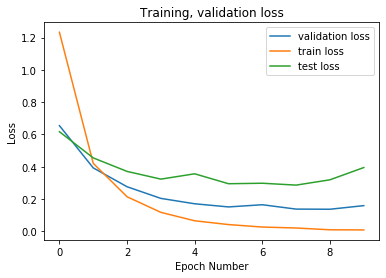

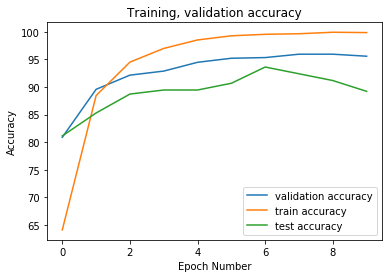

In [12]:
plt.title('Training, validation loss')
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(Val_loss,label='validation loss')
plt.plot(Train_loss,label='train loss')
plt.plot(Test_loss,label='test loss')
plt.plot()
plt.legend(loc='upper right')
plt.show()

plt.title('Training, validation accuracy')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(Val_acc,label='validation accuracy')
plt.plot(Train_acc,label='train accuracy')
plt.plot(Test_acc,label='test accuracy')
plt.plot()
plt.legend(loc='lower right')


In [ ]:
im = cv2.imread("save.jpg") 
#im=PIL.ImageOps.invert(im)
#image = transforms.ToTensor()(im)  
plt.imshow(255-im, cmap = 'gray')
#image=image[0]
# This method will show image in any image viewer  

image=255-im
print(image.shape)

In [ ]:
# image shape: torch.Size([576, 1021])
cell0=image[200:400,0:100,:]
cell1=image[180:400,150:250,:]
cell2=image[180:400,300:400,:]
cell3=image[180:400,400:550,:]
cell4=image[200:400,550:700,:]
cell5=image[180:400,700:800,:]
cell6=image[130:400,800:900,:]
cell7=image[180:400,400:550,:]
cell8=image[100:400,100:400,:]

'''
cell0=transforms.ToPILImage()(cell0)
cell1=transforms.ToPILImage()(cell1)
cell2=transforms.ToPILImage()(cell2)
cell3=transforms.ToPILImage()(cell3)
cell4=transforms.ToPILImage()(cell4)
cell5=transforms.ToPILImage()(cell5)
cell6=transforms.ToPILImage()(cell6)
cell7=transforms.ToPILImage()(cell7)
'''
#print(cell8.shape)
'''
cell0=ratio_crop(1.0)(cell0)
cell1=ratio_crop(1.0)(cell1)
cell2=ratio_crop(1.0)(cell2)
cell3=ratio_crop(1.0)(cell3)
cell4=ratio_crop(1.0)(cell4)
cell5=ratio_crop(1.0)(cell5)
cell6=ratio_crop(1.0)(cell6)
cell7=ratio_crop(1.0)(cell7)

print(cell0.dtype)
'''
'''
cell0=cv2.resize(cell0, (56, 56))
cell1=cv2.resize(cell1, (56, 56))
cell2=cv2.resize(cell2, (56, 56))
cell3=cv2.resize(cell3, (56, 56))
cell4=cv2.resize(cell4, (56, 56))
cell5=cv2.resize(cell5, (56, 56))
cell6=cv2.resize(cell6, (56, 56))
cell7=cv2.resize(cell7, (56, 56))
'''
#cell0=transforms.Pad(10, fill=255, padding_mode='constant')(cell0)
#plt.subplot(4,4,1)
#img = np.moveaxis(cell0.numpy(),0,2)
#cell0=cell0.reshape(56,56,3)
plt.imshow(cell0)
#plt.savefig("C:/Users/zhaoh/Downloads/FYP/deeplearning new/new-number-identification/crop/"+'1.jpg')
plt.show()

#plt.subplot(4,4,2)
plt.imshow(cell1)
#plt.savefig("C:/Users/zhaoh/Downloads/FYP/deeplearning new/new-number-identification/crop/"+'2.jpg')
plt.show()

#plt.subplot(4,4,3)
plt.imshow(cell2)
#plt.savefig("C:/Users/zhaoh/Downloads/FYP/deeplearning new/new-number-identification/crop/"+'3.jpg')
plt.show()
#plt.subplot(4,4,4)
plt.imshow(cell3)
plt.show()
#plt.subplot(4,4,1)
plt.imshow(cell4)
plt.show()
#plt.subplot(4,4,2)
plt.imshow(cell5)
plt.show()
#plt.subplot(4,4,3)
plt.imshow(cell6)
plt.show()
#plt.subplot(4,4,4)
plt.imshow(cell7)
plt.show()


print(cell3.shape)
cv2.imwrite("C:/Users/zhaoh/Downloads/FYP/deeplearning new/new-number-identification/crop/"+'1.jpg',cell0)
cv2.imwrite("C:/Users/zhaoh/Downloads/FYP/deeplearning new/new-number-identification/crop/"+'2.jpg',cell1)
cv2.imwrite("C:/Users/zhaoh/Downloads/FYP/deeplearning new/new-number-identification/crop/"+'3.jpg',cell2)
cv2.imwrite("C:/Users/zhaoh/Downloads/FYP/deeplearning new/new-number-identification/crop/"+'4.jpg',cell3)
cv2.imwrite("C:/Users/zhaoh/Downloads/FYP/deeplearning new/new-number-identification/crop/"+'5.jpg',cell4)
cv2.imwrite("C:/Users/zhaoh/Downloads/FYP/deeplearning new/new-number-identification/crop/"+'6.jpg',cell5)
cv2.imwrite("C:/Users/zhaoh/Downloads/FYP/deeplearning new/new-number-identification/crop/"+'7.jpg',cell6)
cv2.imwrite("C:/Users/zhaoh/Downloads/FYP/deeplearning new/new-number-identification/crop/"+'8.jpg',cell7)

In [ ]:
#"C:/Users/zhaoh/Downloads/FYP/deeplearning new/new-number-identification/crop/"
#"C:/Users/zhaoh/Downloads/FYP/dataset/test/"
'''path='C:/Users/zhaoh/Downloads/FYP/dataset/test/'
i=0
for f in os.listdir(path):
    name=os.path.join(path+str(f))
    if "jpg" in name:
        im = cv2.imread(name)
        i+=1
        flip = 255-im
        cv2.imwrite(name,flip)
print(i)
'''
test_set = DrivingDataset(data_dir="C:/Users/zhaoh/Downloads/FYP/dataset/test/", is_train=False,transform=transform)
testloader = torch.utils.data.DataLoader(test_set, batch_size=5,
                                          shuffle=True, num_workers=0)
for i,j in testloader:
    #i=255-i
    print(i.shape)
    for k in range(4):
        img = np.moveaxis(i[k].numpy(),0,2)
        #print(img.shape)
        plt.imshow(img[:,:,0],cmap='gray')
        plt.show()
    i=i.reshape(-1,3,56,56)
    outputs = model(i.to(device))
    _, predicted = torch.max(outputs.data, 1)
    #outputs = model(cell0.to(device))
    #_, predicted = torch.max(outputs.data, 1)
    #plt.show()
    print("prediction",predicted)

In [13]:
model.eval()
test_set = DrivingDataset(data_dir="C:/Users/zhaoh/Downloads/FYP/UI/master/sliced one/", is_train=False,transform=transform2)
testloader = torch.utils.data.DataLoader(test_set, batch_size=1,
                                          shuffle=False, num_workers=0)
for i,j in testloader:
    #i=255-i
    #print(i.shape)
    data = i[:,0]
    data=data.reshape(-1,1,56,56).float().to(device)
    
    outputs = model(data)
    _, predicted = torch.max(outputs.data, 1)
    print("prediction",predicted)
    #for k in range(5):
        #img = np.moveaxis(i[k].numpy(),0,2)
        #print(img.shape)
        #plt.imshow(img[:,:,0],cmap='gray')
        #plt.show()
    #outputs = model(cell0.to(device))
    #_, predicted = torch.max(outputs.data, 1)
    #print(predicted)
    #plt.show()
    

11
prediction tensor([10], device='cuda:0')
prediction tensor([11], device='cuda:0')
prediction tensor([12], device='cuda:0')
prediction tensor([13], device='cuda:0')
prediction tensor([14], device='cuda:0')
prediction tensor([7], device='cuda:0')
prediction tensor([6], device='cuda:0')
prediction tensor([4], device='cuda:0')
prediction tensor([5], device='cuda:0')
prediction tensor([3], device='cuda:0')
prediction tensor([2], device='cuda:0')


In [ ]:
#torch.save(model.state_dict(),'final')

In [168]:
#confusion matrix
confusion=[[0 for i in range(16)]for j in range(16)]
for i,j in valloader:
    #i=255-i
    #print(i.shape)
    target=j.squeeze(1)
    target = target.long().to(device)
    data = i[:,0]
    data=data.reshape(-1,1,56,56).float().to(device)
    outputs = model(data)
    _, predicted = torch.max(outputs.data, 1)
    #print("prediction",predicted,target)
    for k in range(len(predicted)):
        #print(target[k].item(),' ',predicted[k].item())
        confusion[ target[k].item()][predicted[k].item()]+=1


In [169]:
a=0
list=['0','1','2','3','4','5','6','7','8','9','+','-','*','/','=','.']
print(list)
for i in confusion:
    print(i)
    a+=sum(i)
print(a)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '+', '-', '*', '/', '=', '.']
[44, 1, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3]
[0, 45, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 9]
[1, 9, 39, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1]
[3, 5, 4, 32, 0, 2, 0, 3, 4, 0, 0, 0, 0, 0, 0, 1]
[2, 1, 3, 0, 42, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2]
[3, 2, 0, 3, 1, 26, 0, 5, 2, 1, 0, 0, 0, 0, 0, 11]
[0, 4, 0, 0, 3, 0, 31, 0, 11, 2, 0, 0, 0, 0, 0, 2]
[0, 1, 0, 1, 0, 0, 0, 52, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 5, 0, 0, 2, 0, 1, 0, 42, 2, 0, 0, 0, 0, 0, 1]
[1, 4, 0, 0, 8, 0, 0, 2, 0, 36, 0, 0, 0, 0, 0, 3]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 50, 0, 0, 0, 0, 4]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 54, 0, 0, 0, 1]
[0, 0, 0, 0, 4, 0, 0, 2, 2, 0, 0, 1, 44, 0, 0, 2]
[0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 7, 0, 43, 0, 2]
[0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 7, 0, 1, 43, 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 55]
868


In [204]:
#biggest mistake
model.eval()
test_set = DrivingDataset(data_dir="C:/Users/zhaoh/Downloads/FYP/dataset/eval/", is_train=False,transform=transform2)
testloader = torch.utils.data.DataLoader(test_set, batch_size=10,
                                          shuffle=False, num_workers=0)

a=[[]for i in range(16)]
b=[[]for i in range(16)]
lab=[[]for i in range(16)]

for index,(k,j) in enumerate(testloader):
    #i=255-i
    #print(i.shape)
    data = k[:,0]
    data=data.reshape(-1,1,56,56).float().to(device)
    target=j.squeeze(1)
    target = target.to(device)
    outputs = model(data)
    score, predicted = torch.max(outputs.data, 1)
    #print("prediction",index)#batch result confidence 
    for i in range(len(score)):
        if predicted[i]!=target[i].long():
            #ni=ni+1
            reg=target[i].item()
            #print(target[i].item())
            #print(a[reg])
            #if score[i].item()>a[reg][0]:
            a[reg].append(score[i].item())
            b[reg].append(index*10+i)
            lab[reg].append(predicted[i])
    #for k in range(5):
        #img = np.moveaxis(i[k].numpy(),0,2)
        #print(img.shape)
        #plt.imshow(img[:,:,0],cmap='gray')
        #plt.show()
    #outputs = model(cell0.to(device))
    #_, predicted = torch.max(outputs.data, 1)
    #print(predicted)
    #plt.show()


868


In [205]:
import heapq
c=[]
labe=[]
for k in range(len(a)):
    for i in range (5):
        try:
            index=a[k].index(heapq.nlargest(5,a[k])[i])
            c.append(b[k][index])
            labe.append(lab[k][index])
        except:
            print('no')

no
no
no
no
no
no
no
no
no
no
no
no


tensor(1, device='cuda:0')


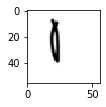

tensor(9, device='cuda:0')
tensor(9, device='cuda:0')
tensor(15, device='cuda:0')
tensor(9, device='cuda:0')
tensor(15, device='cuda:0')
tensor(15, device='cuda:0')
tensor(15, device='cuda:0')
tensor(15, device='cuda:0')


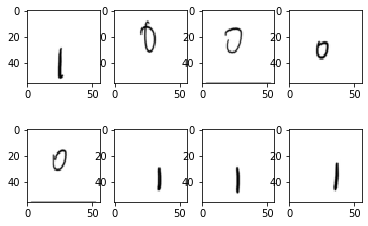

tensor(15, device='cuda:0')
tensor(1, device='cuda:0')
tensor(1, device='cuda:0')
tensor(1, device='cuda:0')
tensor(1, device='cuda:0')
tensor(1, device='cuda:0')
tensor(7, device='cuda:0')
tensor(1, device='cuda:0')


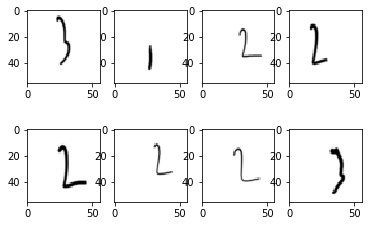

tensor(1, device='cuda:0')
tensor(0, device='cuda:0')
tensor(2, device='cuda:0')
tensor(1, device='cuda:0')
tensor(2, device='cuda:0')
tensor(7, device='cuda:0')
tensor(2, device='cuda:0')
tensor(10, device='cuda:0')


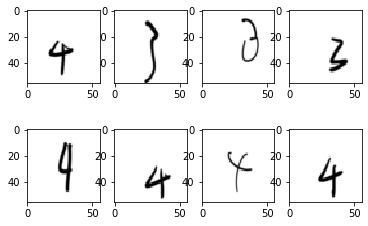

tensor(7, device='cuda:0')
tensor(1, device='cuda:0')
tensor(0, device='cuda:0')
tensor(15, device='cuda:0')
tensor(15, device='cuda:0')
tensor(1, device='cuda:0')
tensor(8, device='cuda:0')
tensor(8, device='cuda:0')


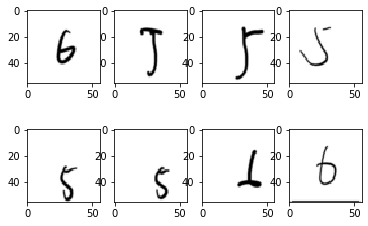

tensor(1, device='cuda:0')
tensor(8, device='cuda:0')
tensor(1, device='cuda:0')
tensor(3, device='cuda:0')
tensor(1, device='cuda:0')
tensor(9, device='cuda:0')
tensor(1, device='cuda:0')
tensor(0, device='cuda:0')


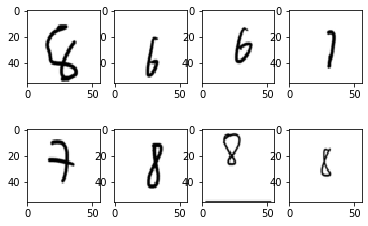

tensor(1, device='cuda:0')
tensor(4, device='cuda:0')
tensor(4, device='cuda:0')
tensor(1, device='cuda:0')
tensor(4, device='cuda:0')
tensor(4, device='cuda:0')
tensor(15, device='cuda:0')
tensor(15, device='cuda:0')


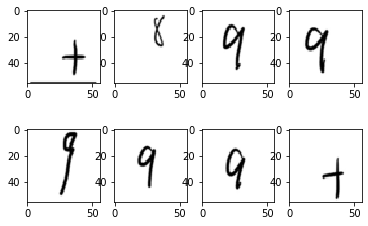

tensor(1, device='cuda:0')
tensor(15, device='cuda:0')
tensor(15, device='cuda:0')
tensor(15, device='cuda:0')
tensor(4, device='cuda:0')
tensor(4, device='cuda:0')
tensor(7, device='cuda:0')
tensor(11, device='cuda:0')


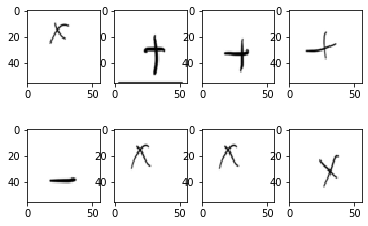

tensor(15, device='cuda:0')
tensor(11, device='cuda:0')
tensor(8, device='cuda:0')
tensor(11, device='cuda:0')
tensor(11, device='cuda:0')
tensor(11, device='cuda:0')
tensor(11, device='cuda:0')
tensor(11, device='cuda:0')


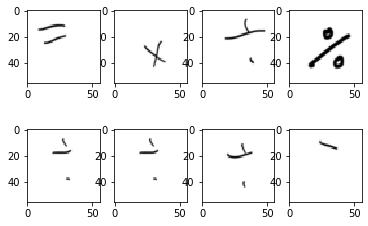

tensor(11, device='cuda:0')
tensor(11, device='cuda:0')
tensor(15, device='cuda:0')


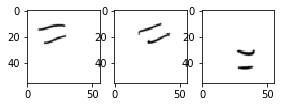

In [212]:
n=1
for i in range(len(c)):
        n+=1
        img = np.moveaxis(test_set[c[i]][0].numpy(),0,2)
        plt.subplot(2,4,i%8+1)
        plt.imshow(img)
        print(labe[i])
        if i%8==0:
            plt.show()
        
#print(n)

In [213]:
print(c)

[833, 864, 856, 835, 823, 452, 471, 473, 468, 466, 776, 786, 762, 803, 806, 685, 694, 670, 689, 665, 300, 293, 286, 311, 323, 245, 247, 222, 248, 258, 611, 651, 624, 605, 607, 550, 547, 136, 144, 157, 148, 141, 402, 411, 412, 435, 394, 518, 514, 516, 504, 494, 349, 731, 731, 722, 740, 713, 106, 59, 77, 77, 105, 171, 197, 197, 189, 200]


In [ ]:
path='C:/Users/zhaoh/Downloads/FYP/dataset/test/'
i=0
for f in os.listdir(path):
    name=os.path.join(path+str(f))
    if "jpg" in name:
        im = cv2.imread(name)
        plt.imshow(im)
        plt.show()
        im1=im[217:312,12:98]#86,4
        im2=im[217:312,102:188]
        im3=im[217:312,192:278]
        im4=im[217:312,282:368]
        im5=im[217:312,372:458]
        im6=im[217:312,462:548]
        im7=im[217:312,552:638]
        im8=im[217:312,642:728]
        im9=im[217:312,732:818]
        im10=im[217:312,822:908]
        im11=im[217:312,912:998]
        #im5=im[870:990,420:575]
        
        plt.imshow(im11)
        #i+=1
        #im=255-im
        #flip = cv2.flip(im, 1)
        
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im1)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im2)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im3)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im4)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im5)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im6)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im7)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im8)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im9) 
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im10)
        cv2.imwrite(path+str(np.random.randint(10000,size=1).item())+'.jpg',im11)
        
#print(i)